# Reverse Feature Elimination

It's very common to have data that has many features, some might be useful in predicting what you want and many might not be useful. How can you tell if you should or should not use a feature in a model? 

The `sci-kit` libary offers a technique called Reverse Feature Elimination (RFE), where it automatically runs many models and finds the combination of features that produce a "parsimonous" model: one that is accurate and simple.

Below, we use generated data to perform RFE. You are then asked to find a real data set on which perform a regression analysis. That work uses all the elements of what we have done so far.

In [ ]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.datasets import make_regression

In [ ]:
# Generate regression dataset with 10 variables
X, y = make_regression(n_samples=1000, n_features=20, n_informative=3, noise=10)

# Convert the data set to a Pandas dataframe
df = pd.DataFrame(X)
df['response'] = y

## Calling RFE

Below we are perform the RFE. You can see that the structure is really similar to what we've done with other modeling tools. The new thing is `n_features_to_select`, which can be set to a given value (like 4 or 10) or like below, we can iterate through all possible values to see the effects.

We store all the important values in lists and use those for plotting.

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Initialize an empty dictionary to store the model performance
scores = {}

# Specify the model to use
model = LinearRegression()

# Loop through the number of features to select
for n_features in range(1, X_train.shape[1]+1):

    # Use RFE to select the most important features
    rfe = RFE(model, n_features_to_select=n_features)
    rfe.fit(X_train, y_train)
    
    # Get the selected features
    selected_features = X_train.columns[rfe.support_].tolist()

    # Train the model and calculate the score
    model.fit(X_train[selected_features], y_train)
    score = model.score(X_test[selected_features], y_test)
    
    # Store the score in the dictionary
    scores[n_features] = score

## Looking at the models

Below, we are plotting the quality of the fits compared to the number of features in the model.

**Can you figure out which combination of features are being used in these models?**

*Focus on one choice of model to do this. Maybe the best accuracy, but fewest features.*

(0.0, 21.0, 0.8, 1.0)

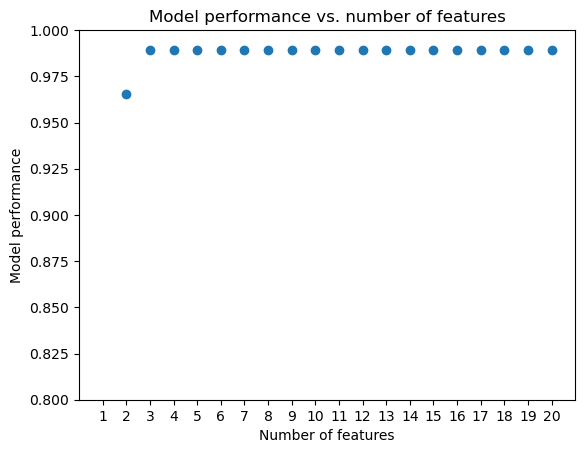

In [13]:
# Plot the model performance vs number of features
plt.scatter(x=list(scores.keys()), y=list(scores.values()))
plt.xlabel('Number of features')
plt.ylabel('Model performance')
plt.title('Model performance vs. number of features')
# Set the x-ticks to integers only
plt.xticks(list(scores.keys()))
plt.axis([0,21,0.8,1.0])

## Things to try
* Try to determine which features are being used in the "best model". You can also look into `sci-kit` best estimators tools, which can automatically return all this.
* Try writing a code for a different `sci-kit` regressor and see how it works.
* Finally, search for a data set that you can use to perform a regression analysis. You can start that work today.